# Get the cmd path

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/skes/final_menu


# Install

In [2]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q supervision roboflow
!conda install -c huggingface huggingface_hub -y
# !conda install -c conda-forge huggingface_hub

DEPRECATION: Loading egg at /home/skes/download/anaconda3-202309/envs/menu/lib/python3.11/site-packages/huggingface_hub-0.23.4-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/skes/download/anaconda3-202309/envs/menu/lib/python3.11/site-packages/huggingface_hub-0.23.4-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Channels:
 - huggingface
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [4]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-rw-r-- 1 skes skes  80M  五  26 23:53 yolov10b.pt
-rw-rw-r-- 1 skes skes 100M  五  26 23:53 yolov10l.pt
-rw-rw-r-- 1 skes skes  64M  五  26 23:54 yolov10m.pt
-rw-rw-r-- 1 skes skes  11M  五  26 23:54 yolov10n.pt
-rw-rw-r-- 1 skes skes  32M  五  26 23:54 yolov10s.pt
-rw-rw-r-- 1 skes skes 123M  五  26 23:54 yolov10x.pt


In [5]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!ls -lh {HOME}/data

total 104K
-rw-rw-r-- 1 skes skes 104K  六   3  2023 dog.jpeg


# Inference

In [12]:
import cv2
from ultralytics import YOLOv10

## pretrained model
# model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
# results = model(source=f'{HOME}/data/dog.jpeg', conf=0.25)

## custom model
model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')
image = cv2.imread(f'/home/skes/final_menu/data/menu1.webp')
results = model(image)[0]


0: 640x320 2 ones, 45.7ms
Speed: 0.5ms preprocess, 45.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 320)


In [13]:
## Get results (boxes, labels)
results.boxes
# results.boxes.xyxy
# results.boxes.cls

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.8192, 0.3242], device='cuda:0')
data: tensor([[160.5918, 164.7242, 173.8976, 172.5916,   0.8192,   0.0000],
        [100.2731, 247.0082, 109.8003, 256.6537,   0.3242,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (424, 198)
shape: torch.Size([2, 6])
xywh: tensor([[167.2447, 168.6579,  13.3058,   7.8674],
        [105.0367, 251.8310,   9.5272,   9.6455]], device='cuda:0')
xywhn: tensor([[0.8447, 0.3978, 0.0672, 0.0186],
        [0.5305, 0.5939, 0.0481, 0.0227]], device='cuda:0')
xyxy: tensor([[160.5918, 164.7242, 173.8976, 172.5916],
        [100.2731, 247.0082, 109.8003, 256.6537]], device='cuda:0')
xyxyn: tensor([[0.8111, 0.3885, 0.8783, 0.4071],
        [0.5064, 0.5826, 0.5545, 0.6053]], device='cuda:0')

## Draw out the annotated image


0: 640x512 5 ones, 4 threes, 7 twos, 2.5ms
Speed: 1.0ms preprocess, 2.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 512)


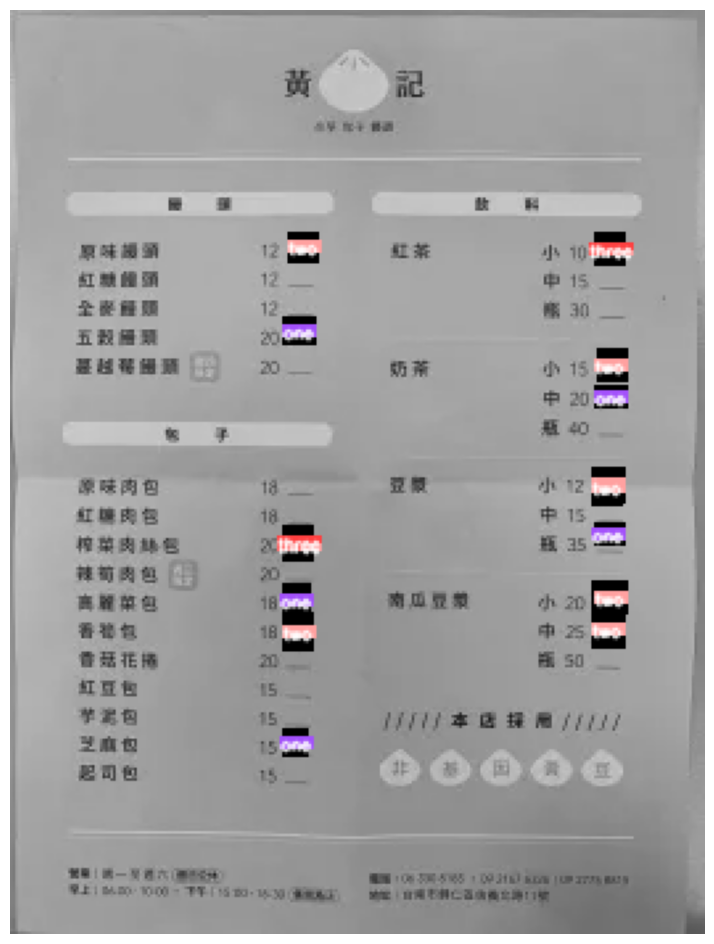

In [15]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')
# image = cv2.imread(f'/path/to/testMenu.jpg')
# image = cv2.imread(f'/home/skes/final_menu/data/testMenu6.jpg')

image = cv2.imread(f'/home/skes/final_menu/data/testMenu5.webp', cv2.IMREAD_GRAYSCALE)
# Convert grayscale image to RGB
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=1)
label_annotator = sv.LabelAnnotator(
    text_position=sv.Position.CENTER,
    text_scale=0.2,
    text_padding=0,
)

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)

for detection_idx in range(len(detections)):
    x1, y1, x2, y2 = detections.xyxy[detection_idx].astype(int)
    color = (0, 0, 0)
    annotated_image = cv2.rectangle(
        img=annotated_image,
        pt1=(x1, y1),
        pt2=(x2, y2),
        color=color,
        thickness=-1,
    )

annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [16]:
cv2.imwrite('annotated_image.jpg', annotated_image)

True